In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats, optimize, interpolate
from scipy.integrate import odeint
plt.rcParams.update({'font.size': 18})

z = np.linspace(0,1,1000)
rp = np.ones(1000)
drp_dz = np.zeros(1000)
def C_diff_eq(C,z):
    dC_dz_zero = C[1] # The C vector contains C and dC/dz
    dC_dz_one = -2 * 1/rp[int(z)] * drp_dz[int(z)] * C[1] - 2/rp[int(z)]*1*C[0]
    return [dC_dz_zero, dC_dz_one]
    
C_left_boundary = 1
dC_dz_left_boundary = 0
sol = odeint(C_diff_eq, [C_left_boundary, dC_dz_left_boundary], z)

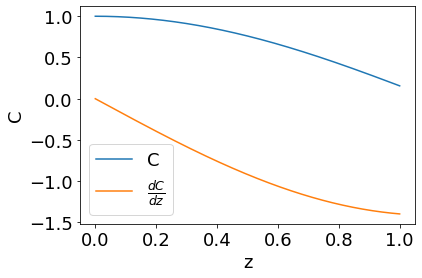

In [2]:
plt.plot(z,sol[:,0],label = r'C')
plt.plot(z,sol[:,1],label = r'$\frac{dC}{dz}$')
plt.xlabel('z')
plt.ylabel('C')
plt.legend()
plt.savefig('concentration_ODE_initial.png',dpi=220,bbox_inches='tight')

In [3]:
from scipy.optimize import fsolve
def func(x):
    return [x[0] * np.cos(x[1]) - 4,
            x[1] * x[0] - x[1] - 5]
root = fsolve(func, [1, 1])
root

array([6.50409711, 0.90841421])